# Task 1 : Perform Exploratory Data Analysis (EDA)

In [1]:
import sys
from pathlib import Path

# Add the project root directory to sys.path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


In [2]:
# import modules
from src.data_loader import DataLoader
from src.eda.descriptive_stats import DescriptiveStats


## Load Dataset

In [3]:
#load data
data_loader = DataLoader("../data/raw_analyst_ratings/raw_analyst_ratings.csv");
df = data_loader.load_data()
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher date  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights  NaT   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights  NaT   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin  NaT   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin  NaT   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer  NaT   

  stock  
0     A  
1     A  
2     A  
3     A  
4     A  


## Descriptive Statistics

### Basic Statistics

In [4]:
# get descriptive statistics
descriptive_stats = DescriptiveStats(df)
descriptive_stats.get_descriptive_stats()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [5]:
# get missing values
descriptive_stats.get_missing_values()

Unnamed: 0        0
headline          0
url               0
publisher         0
date          55987
stock             0
dtype: int64

In [6]:
# get unique values
descriptive_stats.get_unique_values()

Unnamed: 0    1407328
headline       845770
url            883429
publisher        1034
date             3946
stock            6204
dtype: int64

In [7]:
# obtain basic statistics for each column
print("Headline:", descriptive_stats.get_text_length_stats("headline"))
print("-----------------------------------------------------------------------------")
print("URL:", descriptive_stats.get_text_length_stats("url"))
print("-----------------------------------------------------------------------------")
print("Publisher:", descriptive_stats.get_text_length_stats("publisher"))
print("-----------------------------------------------------------------------------")
print("Stock:", descriptive_stats.get_text_length_stats("stock"))

Headline: count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64
-----------------------------------------------------------------------------
URL: count    1.407328e+06
mean     1.105045e+02
std      1.916913e+01
min      3.300000e+01
25%      9.400000e+01
50%      1.150000e+02
75%      1.250000e+02
max      1.620000e+02
Name: url, dtype: float64
-----------------------------------------------------------------------------
Publisher: count    1.407328e+06
mean     1.277136e+01
std      2.701927e+00
min      3.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.400000e+01
max      4.600000e+01
Name: publisher, dtype: float64
-----------------------------------------------------------------------------
Stock: count    1.407328e+06
mean     3.344890e+00
std      6.688505e-01
min      1.000000e+00
25%      3.000000e+00
50%   

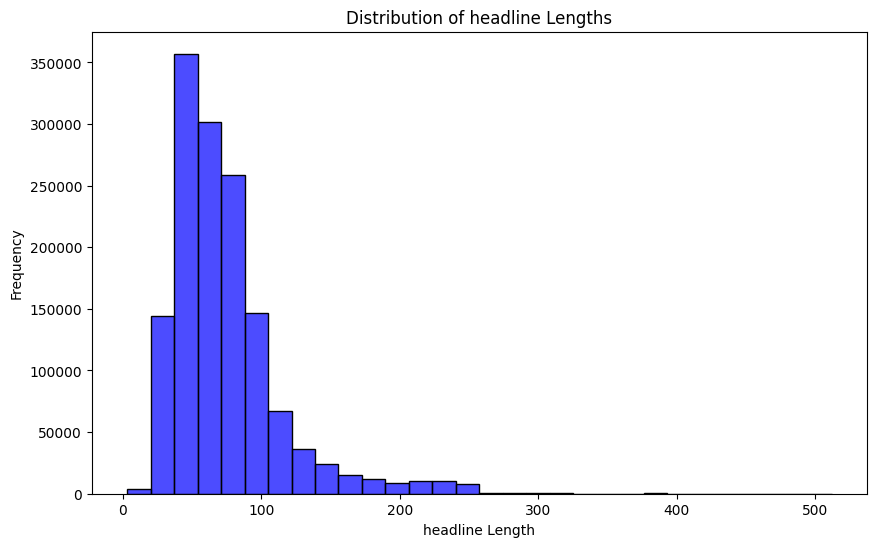

In [8]:
# visualize the distribution of headline lengths
descriptive_stats.plot_text_length_distribution("headline")

### Count the number of articles per publisher to identify which publishers are most active. 

In [9]:
# Count the number of articles per publisher to identify which publishers are most active.
descriptive_stats.get_articles_per_publisher('publisher')

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

''' Paul Quintaro is the most active publisher with 228373 articles. '''

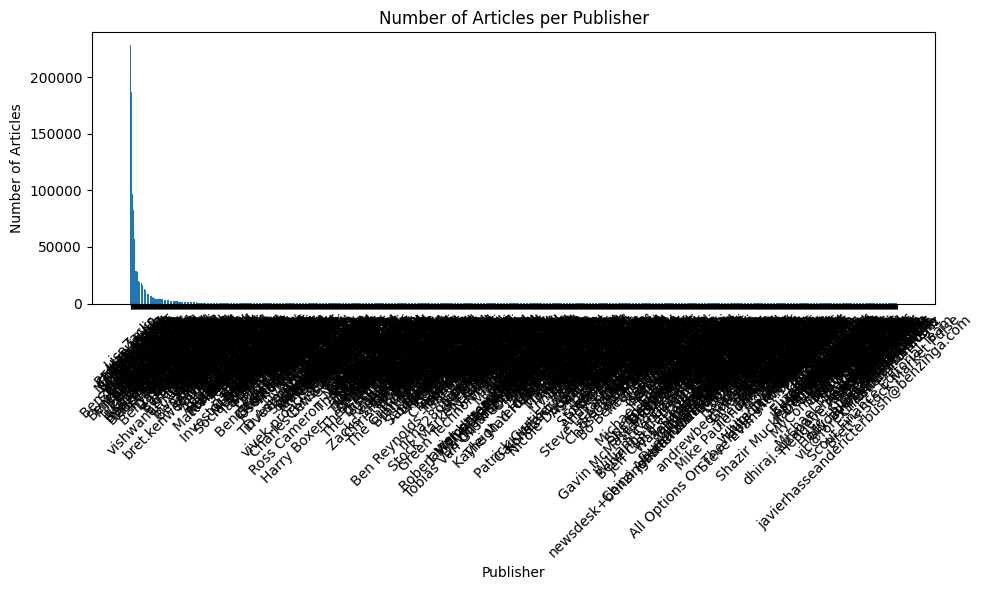

In [10]:
# Visualize the number of articles per publisher
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(descriptive_stats.get_articles_per_publisher('publisher').index, descriptive_stats.get_articles_per_publisher('publisher').values)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Publisher')
plt.xticks(rotation=45)
plt.tight_layout()

### publication trends over time
Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

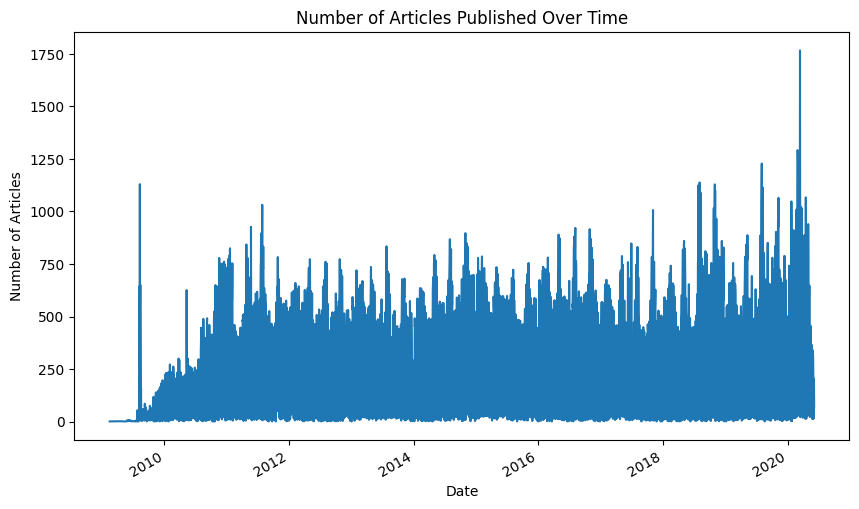

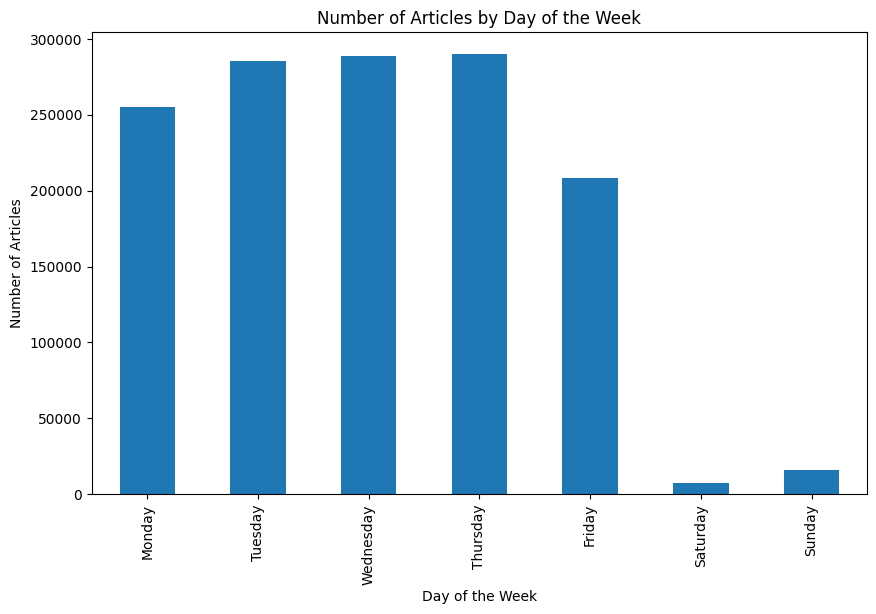

In [11]:
# Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
descriptive_stats.get_publication_date_trends('date')
# Visualize the number of articles by day of the week
descriptive_stats.plot_publication_weekly_trends('date')